In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import keys
import random

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
df = pd.DataFrame(columns={'City': [],  'Country': [], 'Date' : [], 'Latitude' : [], 'Longitude' : [], 'Max temp (F)': [], 'Humidity, %': [], 
                           'Cloudiness,%': [], 'Wind Speed(mph)':[] })

# Create a set of random lat and lng combinations
random.seed(1234)
lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#         latitude.append(lat_lng[0])
#         longitude.append(lat_lng[1])
    
# Print the city count to confirm sufficient count
print(len(cities))

#Sort the list alphabetically
cities = sorted(cities)

#Capitalize cities 
cities = [city.title() for city in cities]


df['City'] = pd.Series(cities)

581


## Perform API Calls

In [11]:
# OpenWeatherMap API Key
# Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

api_key = keys.api_key
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# use iterrows to iterate through pandas dataframe
for index, row in df.iterrows():
    target_url = base_url+ "&q=" + row["City"]
    try:
        response = requests.get(target_url).json()
        print(f"Processing record {index} out of {len(df)},{row['City']}")
        row['Country'] = response['sys']['country']
        row['Date'] = response['dt']
        row["Latitude"] = response['coord']['lat']
        row["Longitude"] = response['coord']['lon']
        row["Max temp (F)"] = response['main']['temp_max']
        row["Humidity, %"] = response['main']['humidity']
        row["Cloudiness,%"] = response['clouds']['all']
        row["Wind Speed(mph)"] = response['wind']['speed']
        
    except(KeyError):
        row['Country'] = "NaN"
        row['Date'] = "NaN"
        row["Latitude"] = "NaN"
        row["Longitude"] = "NaN"
        row["Max temp (F)"] = "NaN"
        row["Humidity, %"] = "NaN"
        row["Cloudiness,%"] = "NaN"
        row["Wind Speed(mph)"] = "Nan"
df

Processing record 0 out of 581,Abapo
Processing record 1 out of 581,Abu Samrah
Processing record 2 out of 581,Acarau
Processing record 3 out of 581,Adrar
Processing record 4 out of 581,Ahipara
Processing record 5 out of 581,Ahualulco
Processing record 6 out of 581,Airai
Processing record 7 out of 581,Aitape
Processing record 8 out of 581,Aklavik
Processing record 9 out of 581,Aksarka
Processing record 10 out of 581,Alanya
Processing record 11 out of 581,Albany
Processing record 12 out of 581,Albertville
Processing record 13 out of 581,Aleksandrovsk-Sakhalinskiy
Processing record 14 out of 581,Aligudarz
Processing record 15 out of 581,Alofi
Processing record 16 out of 581,Alotau
Processing record 17 out of 581,Alta Floresta
Processing record 18 out of 581,Altus
Processing record 19 out of 581,Alvarado
Processing record 20 out of 581,Alyangula
Processing record 21 out of 581,Am Timan
Processing record 22 out of 581,Amapa
Processing record 23 out of 581,Ambilobe
Processing record 24 out o

Processing record 198 out of 581,Havre-Saint-Pierre
Processing record 199 out of 581,Hermanus
Processing record 200 out of 581,Hervey Bay
Processing record 201 out of 581,High Rock
Processing record 202 out of 581,Hilo
Processing record 203 out of 581,Hithadhoo
Processing record 204 out of 581,Hobart
Processing record 205 out of 581,Hofn
Processing record 206 out of 581,Huarmey
Processing record 207 out of 581,Huayapam
Processing record 208 out of 581,Husavik
Processing record 209 out of 581,Igarka
Processing record 210 out of 581,Illoqqortoormiut
Processing record 211 out of 581,Ilulissat
Processing record 212 out of 581,Inderborskiy
Processing record 213 out of 581,Iqaluit
Processing record 214 out of 581,Iquitos
Processing record 215 out of 581,Isangel
Processing record 216 out of 581,Ishigaki
Processing record 217 out of 581,Ishikari
Processing record 218 out of 581,Itarema
Processing record 219 out of 581,Jabiru
Processing record 220 out of 581,Jalu
Processing record 221 out of 58

Processing record 395 out of 581,Pangnirtung
Processing record 396 out of 581,Pascagoula
Processing record 397 out of 581,Patratu
Processing record 398 out of 581,Pervomayskoye
Processing record 399 out of 581,Pevek
Processing record 400 out of 581,Pisco
Processing record 401 out of 581,Pizarro
Processing record 402 out of 581,Pochutla
Processing record 403 out of 581,Ponta Delgada
Processing record 404 out of 581,Ponta Do Sol
Processing record 405 out of 581,Port Alfred
Processing record 406 out of 581,Port Augusta
Processing record 407 out of 581,Port Elizabeth
Processing record 408 out of 581,Port Hardy
Processing record 409 out of 581,Port Hedland
Processing record 410 out of 581,Port Lincoln
Processing record 411 out of 581,Port Macquarie
Processing record 412 out of 581,Port Moresby
Processing record 413 out of 581,Port-Gentil
Processing record 414 out of 581,Portland
Processing record 415 out of 581,Poum
Processing record 416 out of 581,Poya
Processing record 417 out of 581,Pric

,City,Country,Date,Latitude,Longitude,Max temp (F),"Humidity, %","Cloudiness,%",Wind Speed(mph)
0,Abapo,BO,1535207763,-18.83,-63.47,56.96,43,92,4.05
1,Abu Samrah,SY,1535207523,35.3,37.18,95.48,19,0,15.57
2,Acarau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nan
3,Adrar,DZ,1535205600,27.87,-0.29,105.8,14,0,14.99
4,Ahipara,NZ,1535207525,-35.17,173.16,54.98,92,92,11.54
5,Ahualulco,MX,1535204820,22.4,-101.17,62.6,72,5,3.36
6,Airai,TL,1535207525,-8.93,125.41,68.75,93,76,2.04
7,Aitape,PG,1535207764,-3.15,142.36,76.49,100,76,3.94
8,Aklavik,CA,1535205600,68.22,-135.01,41,100,75,4.7
9,Aksarka,RU,1535207765,66.56,67.8,55.34,49,20,16.24


In [12]:
#Drop rows with NaN values and see how many cities are left
df = df[df.Latitude != 'NaN']
df.shape

#Save data to a csv file 
df.to_csv("cities.csv", encoding='utf-8', index=False)


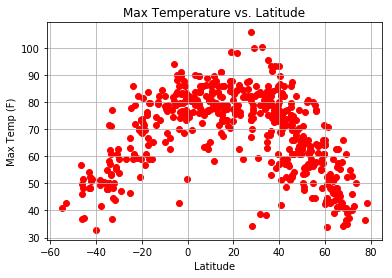

In [13]:
#Build scatter plots to showcase the relationship between Latitude and Max Temp:

plt.scatter(df["Latitude"], df["Max temp (F)"], marker="o", c = "red")

# Incorporate the other graph properties
plt.title("Max Temperature vs. Latitude")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure 
plt.savefig('TempVsLatitude.png')

# Show plot
plt.show()



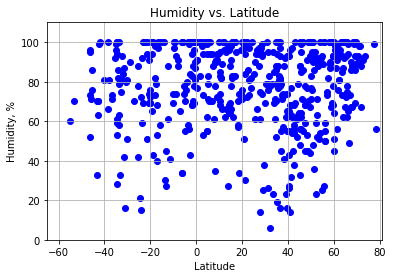

In [23]:
##Build scatter plots to showcase the relationship between Latitude and Humidity:
plt.scatter(df["Latitude"], df["Humidity, %"], marker="o", c = "blue")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity, %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim((np.min(-65), np.max(81)))
plt.ylim((np.min(0), np.max(110)))

#Save figure 
plt.savefig('HumidityVsLatitude.png')

plt.show()

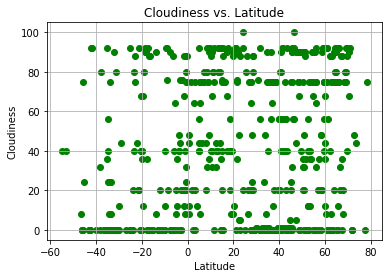

In [21]:
#Build scatter plot to showcase the relationship between Latitude and Cloudiness:

plt.scatter(df["Latitude"], df["Cloudiness,%"], marker="o", c = "green")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure 
plt.savefig('HumidityVsLatitude.png')

plt.show()


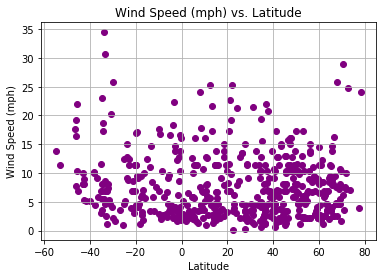

In [22]:
#Build scatter plot to showcase the relationship between Latitude and Wind Speed:

plt.scatter(df["Latitude"], df["Wind Speed(mph)"], marker="o", c = "purple")

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure 
plt.savefig('WindVsLatitude.png')

plt.show()


## Findings:

1. It seems like there is no correlation between latitude and humidity,latitude and wind speed, latitude and cloudiness. However, latitude does determine temerature. The plot "Max Temperature vs Latitude" shows that temperatures drop the further an area is from the equator, which is due to the curvature of the earth. 


2. Maximum temperatures are observed between 20th and 30th degree of latitude and not the equator, which is something that requires further research.


3. It seems like more of the data points on all of the plots are located between 0 and 90 degree latitude, which makes sense since there are more cities in northern hemisphere than in southern. 